In [3]:
!pip install geopandas


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [5]:
!pip uninstall notebook jupyter_contrib_nbextensions jupyter_nbextensions_configurator httpcore httpx -y


Found existing installation: notebook 7.2.0
Uninstalling notebook-7.2.0:
  Successfully uninstalled notebook-7.2.0
Found existing installation: jupyter-contrib-nbextensions 0.7.0
Uninstalling jupyter-contrib-nbextensions-0.7.0:
  Successfully uninstalled jupyter-contrib-nbextensions-0.7.0
Found existing installation: jupyter-nbextensions-configurator 0.6.3
Uninstalling jupyter-nbextensions-configurator-0.6.3:
  Successfully uninstalled jupyter-nbextensions-configurator-0.6.3
Found existing installation: httpcore 0.18.0
Uninstalling httpcore-0.18.0:
  Successfully uninstalled httpcore-0.18.0
Found existing installation: httpx 0.25.0
Uninstalling httpx-0.25.0:
  Successfully uninstalled httpx-0.25.0


In [6]:
!pip install notebook
!pip install jupyter_contrib_nbextensions
!pip install httpcore==0.18.0 httpx==0.25.0


  Using cached jupyterlab_server-2.27.2-py3-none-any.whl.metadata (5.9 kB)
  Using cached httpcore-1.0.5-py3-none-any.whl.metadata (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 22.7 MB/s eta 0:00:0000:0100:01
Using cached jupyterlab_server-2.27.2-py3-none-any.whl (59 kB)
Using cached httpcore-1.0.5-py3-none-any.whl (77 kB)
  Attempting uninstall: jupyterlab-server
    Found existing installation: jupyterlab_server 2.25.1
    Uninstalling jupyterlab_server-2.25.1:
      Successfully uninstalled jupyterlab_server-2.25.1
  Using cached jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 3.9 MB/s eta 0:00:0000:0100:01
  Using cached httpcore-0.18.0-py3-none-any.whl.metadata (18 kB)
  Using cached httpx-0.25.0-py3-none-any.whl.metadata (7.6 kB)
Using cached httpcore-0.18.0-py3-none-any.whl (76 kB)
Using cached httpx-0.25.0-py3-none-any.whl (75 kB)
  Attempting uninstall: httpcore
    Found existing installation:

In [7]:
!jupyter contrib nbextension install --user
!jupyter nbextensions_configurator enable --user

Traceback (most recent call last):
  File "/Users/joshfanning/anaconda3/bin/jupyter-contrib", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/Users/joshfanning/anaconda3/lib/python3.11/site-packages/jupyter_core/application.py", line 280, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/Users/joshfanning/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 990, in launch_instance
    app = cls.instance(**kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/joshfanning/anaconda3/lib/python3.11/site-packages/traitlets/config/configurable.py", line 552, in instance
    inst = cls(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/joshfanning/anaconda3/lib/python3.11/site-packages/jupyter_contrib_core/application.py", line 27, in __init__
    self._refresh_subcommands()
  File "/Users/joshfanning/anaconda3/lib/python3.11/site-packages/jupyter_contrib_core/application.py", line 43, in _refresh_subcom

## Loading the data

In [9]:
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')
listings = pd.read_csv('listings.csv')
neighbourhoods = pd.read_csv('neighbourhoods.csv')
neighbourhoods_geo = gpd.read_file('neighbourhoods.geojson')

/var/folders/y0/dc8z5ks16n7glxpg7zt7b4j00000gn/T/ipykernel_32549/1323936127.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar = pd.read_csv('calendar.csv')


### Issue with accessing files so investigated further with the following

In [11]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/joshfanning/Documents/Professional2023/Data Analytics Course/Project/Airbnb2


In [12]:
# List all files in the current working directory
print("Files in Current Directory:", os.listdir())

Files in Current Directory: ['data_snippets', 'listings_heatmap.png', 'reviews.csv', '.DS_Store', 'neighbourhoods.geojson', 'Untitled.ipynb', 'neighbourhoods.csv', 'listings.csv', 'calendar.csv', 'Airbnb_project2.ipynb', 'reviews_summary.csv', '.ipynb_checkpoints', 'listings_summary.csv']


Managed to find out that thre files were in another folder so was an easy fix

## Analysis

In [15]:
nulls_adjusted_price = calendar['adjusted_price'].isnull().sum()
not_nulls_adjusted_price = calendar['adjusted_price'].notnull().sum()
print(f"Number of null adjusted price values: {nulls_adjusted_price}")
print(f"Number of non-null adjusted price values: {not_nulls_adjusted_price}")

Number of null adjusted price values: 33156195
Number of non-null adjusted price values: 6205


### Calendar table summary

In [17]:
calendar.shape

(33162400, 7)

In [18]:
calendar.describe()

,listing_id,minimum_nights,maximum_nights
count,3.316240e+07,3.316240e+07,3.316240e+07
mean,4.527908e+17,6.504974e+00,4.555497e+05
std,4.615526e+17,2.452395e+01,3.109590e+07
min,1.391300e+04,1.000000e+00,1.000000e+00
25%,2.438725e+07,1.000000e+00,9.900000e+01
50%,5.572239e+17,2.000000e+00,3.650000e+02
75%,9.274481e+17,4.000000e+00,1.125000e+03
max,1.115348e+18,1.125000e+03,2.147484e+09


In [19]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33162400 entries, 0 to 33162399
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.7+ GB


In [56]:
calendar[calendar['adjusted_price'].notnull()]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
8096141,23645636,2024-03-22,f,$986.00,$897.00,2.0,1125.0
8096444,23645636,2024-03-23,f,"$1,018.00",$926.00,2.0,1125.0
8096445,23645636,2024-03-24,t,"$1,027.00",$935.00,2.0,1125.0
8096446,23645636,2024-03-25,t,"$1,022.00",$930.00,2.0,1125.0
8096447,23645636,2024-03-26,t,"$1,019.00",$927.00,2.0,1125.0
...,...,...,...,...,...,...,...
25606663,944116194948399060,2025-03-15,t,"$1,400.00","$1,400.00",3.0,365.0
25606664,944116194948399060,2025-03-16,t,"$1,400.00","$1,400.00",3.0,365.0
25606665,944116194948399060,2025-03-17,t,"$1,400.00","$1,400.00",3.0,365.0
25606666,944116194948399060,2025-03-18,t,"$1,400.00","$1,400.00",3.0,365.0


In [21]:
nulls_adjusted_price = calendar['adjusted_price'].isnull().sum()
not_nulls_adjusted_price = calendar['adjusted_price'].notnull().sum()
print(f"Number of null adjusted price values: {nulls_adjusted_price}")
print(f"Number of non-null adjusted price values: {not_nulls_adjusted_price}")

Number of null adjusted price values: 33156195
Number of non-null adjusted price values: 6205


### Reviews table summary

In [23]:
reviews.shape

(1618347, 6)

In [24]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618347 entries, 0 to 1618346
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1618347 non-null  int64 
 1   id             1618347 non-null  int64 
 2   date           1618347 non-null  object
 3   reviewer_id    1618347 non-null  int64 
 4   reviewer_name  1618347 non-null  object
 5   comments       1618189 non-null  object
dtypes: int64(3), object(3)
memory usage: 74.1+ MB


In [25]:
reviews.describe()

,listing_id,id,reviewer_id
count,1.618347e+06,1.618347e+06,1.618347e+06
mean,1.767108e+17,4.794322e+17,1.609752e+08
std,3.352136e+17,4.354943e+17,1.566534e+08
min,1.391300e+04,2.103200e+04,4.600000e+01
25%,1.242917e+07,3.570361e+08,3.353483e+07
50%,2.656527e+07,6.055823e+17,1.034147e+08
75%,5.240609e+07,9.049516e+17,2.457062e+08
max,1.113967e+18,1.117392e+18,5.677329e+08


### Listings table summary

In [27]:
listings.shape

(90852, 75)

In [28]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            90852 non-null  int64  
 1   listing_url                                   90852 non-null  object 
 2   scrape_id                                     90852 non-null  int64  
 3   last_scraped                                  90852 non-null  object 
 4   source                                        90852 non-null  object 
 5   name                                          90852 non-null  object 
 6   description                                   87851 non-null  object 
 7   neighborhood_overview                         47521 non-null  object 
 8   picture_url                                   90842 non-null  object 
 9   host_id                                       90852 non-null 

In [29]:
listings['price'][:20]

0       $160.00
1        $65.00
2       $120.00
3        $65.00
4       $100.00
5           NaN
6           NaN
7       $474.00
8           NaN
9     $1,300.00
10      $137.00
11          NaN
12      $140.00
13          NaN
14      $112.00
15      $245.00
16      $145.00
17       $60.00
18      $250.00
19      $180.00
Name: price, dtype: object

In [16]:
listings[:20]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,312761,https://www.airbnb.com/rooms/312761,20240319050633,2024-03-21,city scrape,Spacious Central London Apartment by Hoxton Sq...,"Very central location, in the middle of Shored...",Everything is so convenient and the area is al...,https://a0.muscache.com/pictures/miso/Hosting-...,1608226,...,5.00,4.89,4.93,NaN,f,1,1,0,0,0.86
1,13913,https://www.airbnb.com/rooms/13913,20240319050633,2024-03-20,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.83,4.70,4.70,NaN,f,3,2,1,0,0.25
2,15400,https://www.airbnb.com/rooms/15400,20240319050633,2024-03-20,city scrape,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.83,4.93,4.74,NaN,f,1,1,0,0,0.54
3,159736,https://www.airbnb.com/rooms/159736,20240319050633,2024-03-20,city scrape,A double Room 5mins from King's College Hospital,Calm sunny double room with a queen size bed a...,We love that in Loughborough Junction we live ...,https://a0.muscache.com/pictures/1067303/d2300...,766056,...,4.89,4.34,4.66,NaN,f,4,0,4,0,0.62
4,165336,https://www.airbnb.com/rooms/165336,20240319050633,2024-03-21,city scrape,Charming Flat in Notting Hill,A stylish apartment close to Portobello market...,"Notting Hill has many cafes, bars and restaura...",https://a0.muscache.com/pictures/60757460/47f8...,761400,...,4.96,4.87,4.71,NaN,f,1,1,0,0,1.57
5,313710,https://www.airbnb.com/rooms/313710,20240319050633,2024-03-22,previous scrape,Pretty Home Kensal Green NW10 1 bed,Bright First Floor 1 bed flat with private ro...,NaN,https://a0.muscache.com/pictures/3459345/f5e4f...,1612623,...,5.00,4.56,4.67,NaN,f,1,1,0,0,0.07
6,168359,https://www.airbnb.com/rooms/168359,20240319050633,2024-03-22,previous scrape,Stunning 2 Bed Apartment in Elephant & Castle,This 2 bedroom flat is in a brilliantly conven...,Walworth is a central district in the London B...,https://a0.muscache.com/pictures/dec19897-d7e8...,648725,...,4.88,4.13,4.75,NaN,f,1,1,0,0,0.06
7,17402,https://www.airbnb.com/rooms/17402,20240319050633,2024-03-22,city scrape,Fab 3-Bed/2 Bath & Wifi: Trendy W1,"You'll have a great time in this beautiful, cl...","Fitzrovia is a very desirable trendy, arty and...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,...,4.72,4.89,4.61,NaN,f,7,7,0,0,0.35
8,24328,https://www.airbnb.com/rooms/24328,20240319050633,2024-03-22,previous scrape,"Battersea live/work artist house, garden communal","Artist house, bright high ceiling rooms for bo...","- Battersea is a quiet family area, easy acces...",https://a0.muscache.com/pictures/miso/Hosting-...,41759,...,4.93,4.59,4.65,NaN,f,1,1,0,0,0.58
9,170524,https://www.airbnb.com/rooms/170524,20240319050633,2024-03-20,city scrape,STUNNING APT IN ST JAMES,NaN,NaN,https://a0.muscache.com/pictures/1077542/ba973...,194769,...,NaN,NaN,NaN,NaN,f,4,3,1,0,NaN


In [17]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.085200e+04,9.085200e+04,9.085200e+04,90847.000000,90847.000000,0.0,90852.000000,90852.000000,90852.000000,57894.000000,...,65808.000000,65833.000000,65808.000000,65806.000000,0.0,90852.000000,90852.000000,90852.000000,90852.000000,65869.000000
mean,4.527984e+17,2.024032e+13,1.723429e+08,41.622618,83.834722,NaN,51.509630,-0.127207,3.208911,1.371740,...,4.801870,4.829303,4.741214,4.633462,NaN,18.495927,14.667327,3.717078,0.022729,0.905957
std,4.615528e+17,3.969553e+01,1.817542e+08,229.046589,513.523173,NaN,0.048826,0.100384,2.006278,0.711349,...,0.389928,0.370222,0.372749,0.465826,NaN,65.205497,52.649580,22.325225,0.320497,1.195357
min,1.391300e+04,2.024032e+13,2.594000e+03,1.000000,1.000000,NaN,51.295937,-0.497800,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.438699e+07,2.024032e+13,2.323404e+07,1.000000,1.000000,NaN,51.483313,-0.189410,2.000000,1.000000,...,4.760000,4.800000,4.650000,4.500000,NaN,1.000000,0.000000,0.000000,0.000000,0.160000
50%,5.572649e+17,2.024032e+13,8.876773e+07,2.000000,3.000000,NaN,51.513818,-0.126290,2.000000,1.000000,...,4.940000,4.970000,4.850000,4.750000,NaN,2.000000,1.000000,0.000000,0.000000,0.490000
75%,9.274492e+17,2.024032e+13,2.992224e+08,7.000000,11.000000,NaN,51.539508,-0.067210,4.000000,1.500000,...,5.000000,5.000000,5.000000,5.000000,NaN,6.000000,3.000000,1.000000,0.000000,1.140000
max,1.115348e+18,2.024032e+13,5.677004e+08,2360.000000,5658.000000,NaN,51.681781,0.295731,16.000000,26.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,558.000000,412.000000,268.000000,11.000000,32.260000


### Neighbourhoods table summary

In [ ]:
neighbourhoods.shape

In [35]:
neighbourhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        33 non-null     object 
dtypes: float64(1), object(1)
memory usage: 660.0+ bytes


In [36]:
print(neighbourhoods[:20])

    neighbourhood_group           neighbourhood
0                   NaN    Barking and Dagenham
1                   NaN                  Barnet
2                   NaN                  Bexley
3                   NaN                   Brent
4                   NaN                 Bromley
5                   NaN                  Camden
6                   NaN          City of London
7                   NaN                 Croydon
8                   NaN                  Ealing
9                   NaN                 Enfield
10                  NaN               Greenwich
11                  NaN                 Hackney
12                  NaN  Hammersmith and Fulham
13                  NaN                Haringey
14                  NaN                  Harrow
15                  NaN                Havering
16                  NaN              Hillingdon
17                  NaN                Hounslow
18                  NaN               Islington
19                  NaN  Kensington and 

Could join these on as another column on the listings and/or reviews tables

Check if there is a package in python that can convert latitude/longitude to the neighbourhood name

### Neighbourhoods geo table summary

### The following is a json file which could be used in visualisations 

In [ ]:
neighbourhoods_geo.shape

In [37]:
neighbourhoods_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        33 non-null     object  
 1   neighbourhood_group  0 non-null      object  
 2   geometry             33 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 924.0+ bytes


In [ ]:
neighbourhoods_geo[:33]

## Futher analysis of dataframes

Check for duplicates


In [21]:
# Check for duplicates based on the 'id' column
reviews_duplicates = reviews[reviews.duplicated(subset='id', keep=False)]

calendar_duplicates = calendar[calendar.duplicated(subset='listing_id', keep=False)]

listings_duplicates = listings[listings.duplicated(subset='id', keep=False)]


# Display duplicates if any
print(reviews_duplicates)

print(calendar_duplicates)

print(listings_duplicates)

Empty DataFrame
Columns: [listing_id, id, date, reviewer_id, reviewer_name, comments]
Index: []
                   listing_id        date available    price adjusted_price  \
0                      312761  2024-03-21         f  $240.00            NaN   
1                       13913  2024-03-20         f   $65.00            NaN   
2                       13913  2024-03-21         t   $65.00            NaN   
3                       13913  2024-03-22         t   $65.00            NaN   
4                       13913  2024-03-23         t   $65.00            NaN   
...                       ...         ...       ...      ...            ...   
33162395  1115347885713265376  2025-03-14         t  $578.00            NaN   
33162396  1115347885713265376  2025-03-15         t  $578.00            NaN   
33162397  1115347885713265376  2025-03-16         t  $578.00            NaN   
33162398  1115347885713265376  2025-03-17         t  $578.00            NaN   
33162399  1115347885713265376  2025

Checking how many duplicated numbers of calendar dataframe to see number of reviews for listings

In [22]:
calendar_duplicates = calendar[calendar.duplicated(subset='listing_id', keep=False)]['listing_id'].value_counts()
print(calendar_duplicates)

listing_id
312761                 365
844834517280762780     365
843950300688413249     365
844727765033481766     365
842551079237556261     365
                      ... 
34558019               365
34417904               365
1115347885713265376    365
645405549497969502     345
1086837221344026350    345
Name: count, Length: 90856, dtype: int64


Finding out the entries where neighbourhood is null to correct the missing entries - already been done in neighbourhood cleansed but seeing if I could produce it myself as a cleaning/correction challenge

In [20]:
#Create test listings table
listings_test = listings.copy()

# Filter rows where the 'neighbourhood' column is null, retaining all relevant columns
null_neighbourhoods = listings_test[listings_test['neighbourhood'].isnull()].copy()

# Create a GeoDataFrame for the null neighbourhood entries, including 'id', 'latitude', 'longitude'
geometry = [Point(xy) for xy in zip(null_neighbourhoods['longitude'], null_neighbourhoods['latitude'])]
geo_null_neighbourhoods = gpd.GeoDataFrame(null_neighbourhoods, geometry=geometry)

# Set CRS to WGS84 (EPSG:4326) if not already set
geo_null_neighbourhoods.set_crs(epsg=4326, inplace=True)
neighbourhoods_geo.set_crs(epsg=4326, inplace=True)

# Perform the spatial join to find correct neighborhoods
joined_data = gpd.sjoin(geo_null_neighbourhoods, neighbourhoods_geo, how="left", predicate='within')

# Print the columns of the joined data to verify column names
print("Columns in joined_data:", joined_data.columns)

# Rename columns to avoid conflicts
joined_data = joined_data.rename(columns={'neighbourhood_right': 'joined_neighbourhood', 'neighbourhood_left': 'original_neighbourhood'})

# Verify the columns after the join
print("Columns after spatial join and renaming:", joined_data.columns)

# Extract the relevant columns, including 'id' and 'joined_neighbourhood'
updated_neighbourhoods = joined_data[['id', 'joined_neighbourhood']]

# Ensure the correct column names before updating
print("Columns in updated_neighbourhoods:", updated_neighbourhoods.columns)

# Use the 'id' to update the original listings_test DataFrame
listings_test.set_index('id', inplace=True)
updated_neighbourhoods.set_index('id', inplace=True)

# Update the original listings_test DataFrame with the new neighbourhoods
listings_test.update(updated_neighbourhoods.rename(columns={'joined_neighbourhood': 'neighbourhood'}))

# Reset index to restore 'id' as a column
listings_test.reset_index(inplace=True)





Columns in joined_data: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_left',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       

In [21]:
# Display the updated listings test DataFrame
listings_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            90852 non-null  int64  
 1   listing_url                                   90852 non-null  object 
 2   scrape_id                                     90852 non-null  int64  
 3   last_scraped                                  90852 non-null  object 
 4   source                                        90852 non-null  object 
 5   name                                          90852 non-null  object 
 6   description                                   87851 non-null  object 
 7   neighborhood_overview                         47521 non-null  object 
 8   picture_url                                   90842 non-null  object 
 9   host_id                                       90852 non-null 

In [26]:
# Display rows where 'neighbourhood' is not the same as 'neighbourhood_cleansed'
mismatched_neighbourhoods = listings_test[listings_test['neighbourhood'] != listings_test['neighbourhood_cleansed']]

# Print the mismatched rows
print(mismatched_neighbourhoods[['id', 'longitude', 'latitude', 'neighbourhood', 'neighbourhood_cleansed']])

                        id  longitude   latitude  \
0                   312761  -0.081290  51.527040   
1                    13913  -0.112700  51.568610   
2                    15400  -0.168130  51.487800   
3                   159736  -0.099930  51.467880   
4                   165336  -0.210760  51.517350   
...                    ...        ...        ...   
90810  1115221812686972915  -0.228000  51.504000   
90817  1115240135281822129  -0.076290  51.527420   
90818  1113689599491505308  -0.266945  51.509414   
90839  1113737843656205634  -0.148521  51.487930   
90850  1115338006572763275  -0.161906  51.513649   

                                   neighbourhood  neighbourhood_cleansed  
0                London, England, United Kingdom                 Hackney  
1      Islington, Greater London, United Kingdom               Islington  
2                         London, United Kingdom  Kensington and Chelsea  
3               Lambeth, England, United Kingdom                 Lambeth  


Could join these on as another column on the listings and/or reviews tables

Check if there is a package in python that can convert latitude/longitude to the neighbourhood name

### Neighbourhoods geo table

#### The following is a json file which could be used in visualisations 

In [ ]:
neighbourhoods_geo.shape

In [37]:
neighbourhoods_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        33 non-null     object  
 1   neighbourhood_group  0 non-null      object  
 2   geometry             33 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 924.0+ bytes


In [ ]:
neighbourhoods_geo[:33]

### Snippets for google sheets


In [38]:
# Get the first 20 rows of each DataFrame
calendar_snippet = calendar.head(20)
reviews_snippet = reviews.head(20)
listings_snippet = listings.head(20)
neighbourhoods_snippet = neighbourhoods.head(20)
neighbourhoods_geo_snippet = neighbourhoods_geo.head(20)

# Create a new folder in the working directory called 'data_snippets'
os.makedirs('data_snippets', exist_ok=True)

# Save the snippets as CSV files in the 'data_snippets' folder
calendar_snippet.to_csv('data_snippets/calendar_snippet.csv', index=False)
reviews_snippet.to_csv('data_snippets/reviews_snippet.csv', index=False)
listings_snippet.to_csv('data_snippets/listings_snippet.csv', index=False)
neighbourhoods_snippet.to_csv('data_snippets/neighbourhoods_snippet.csv', index=False)
neighbourhoods_geo_snippet.to_csv('data_snippets/neighbourhoods_geo_snippet.csv', index=False)

### Checking to see correlation on different sheets

In [45]:
# Select only numeric columns for correlation
listings_numeric = listings.select_dtypes(include=[np.number])
reviews_numeric = reviews.select_dtypes(include=[np.number])
calendar_numeric = calendar.select_dtypes(include=[np.number])

#### Listings correation heat map

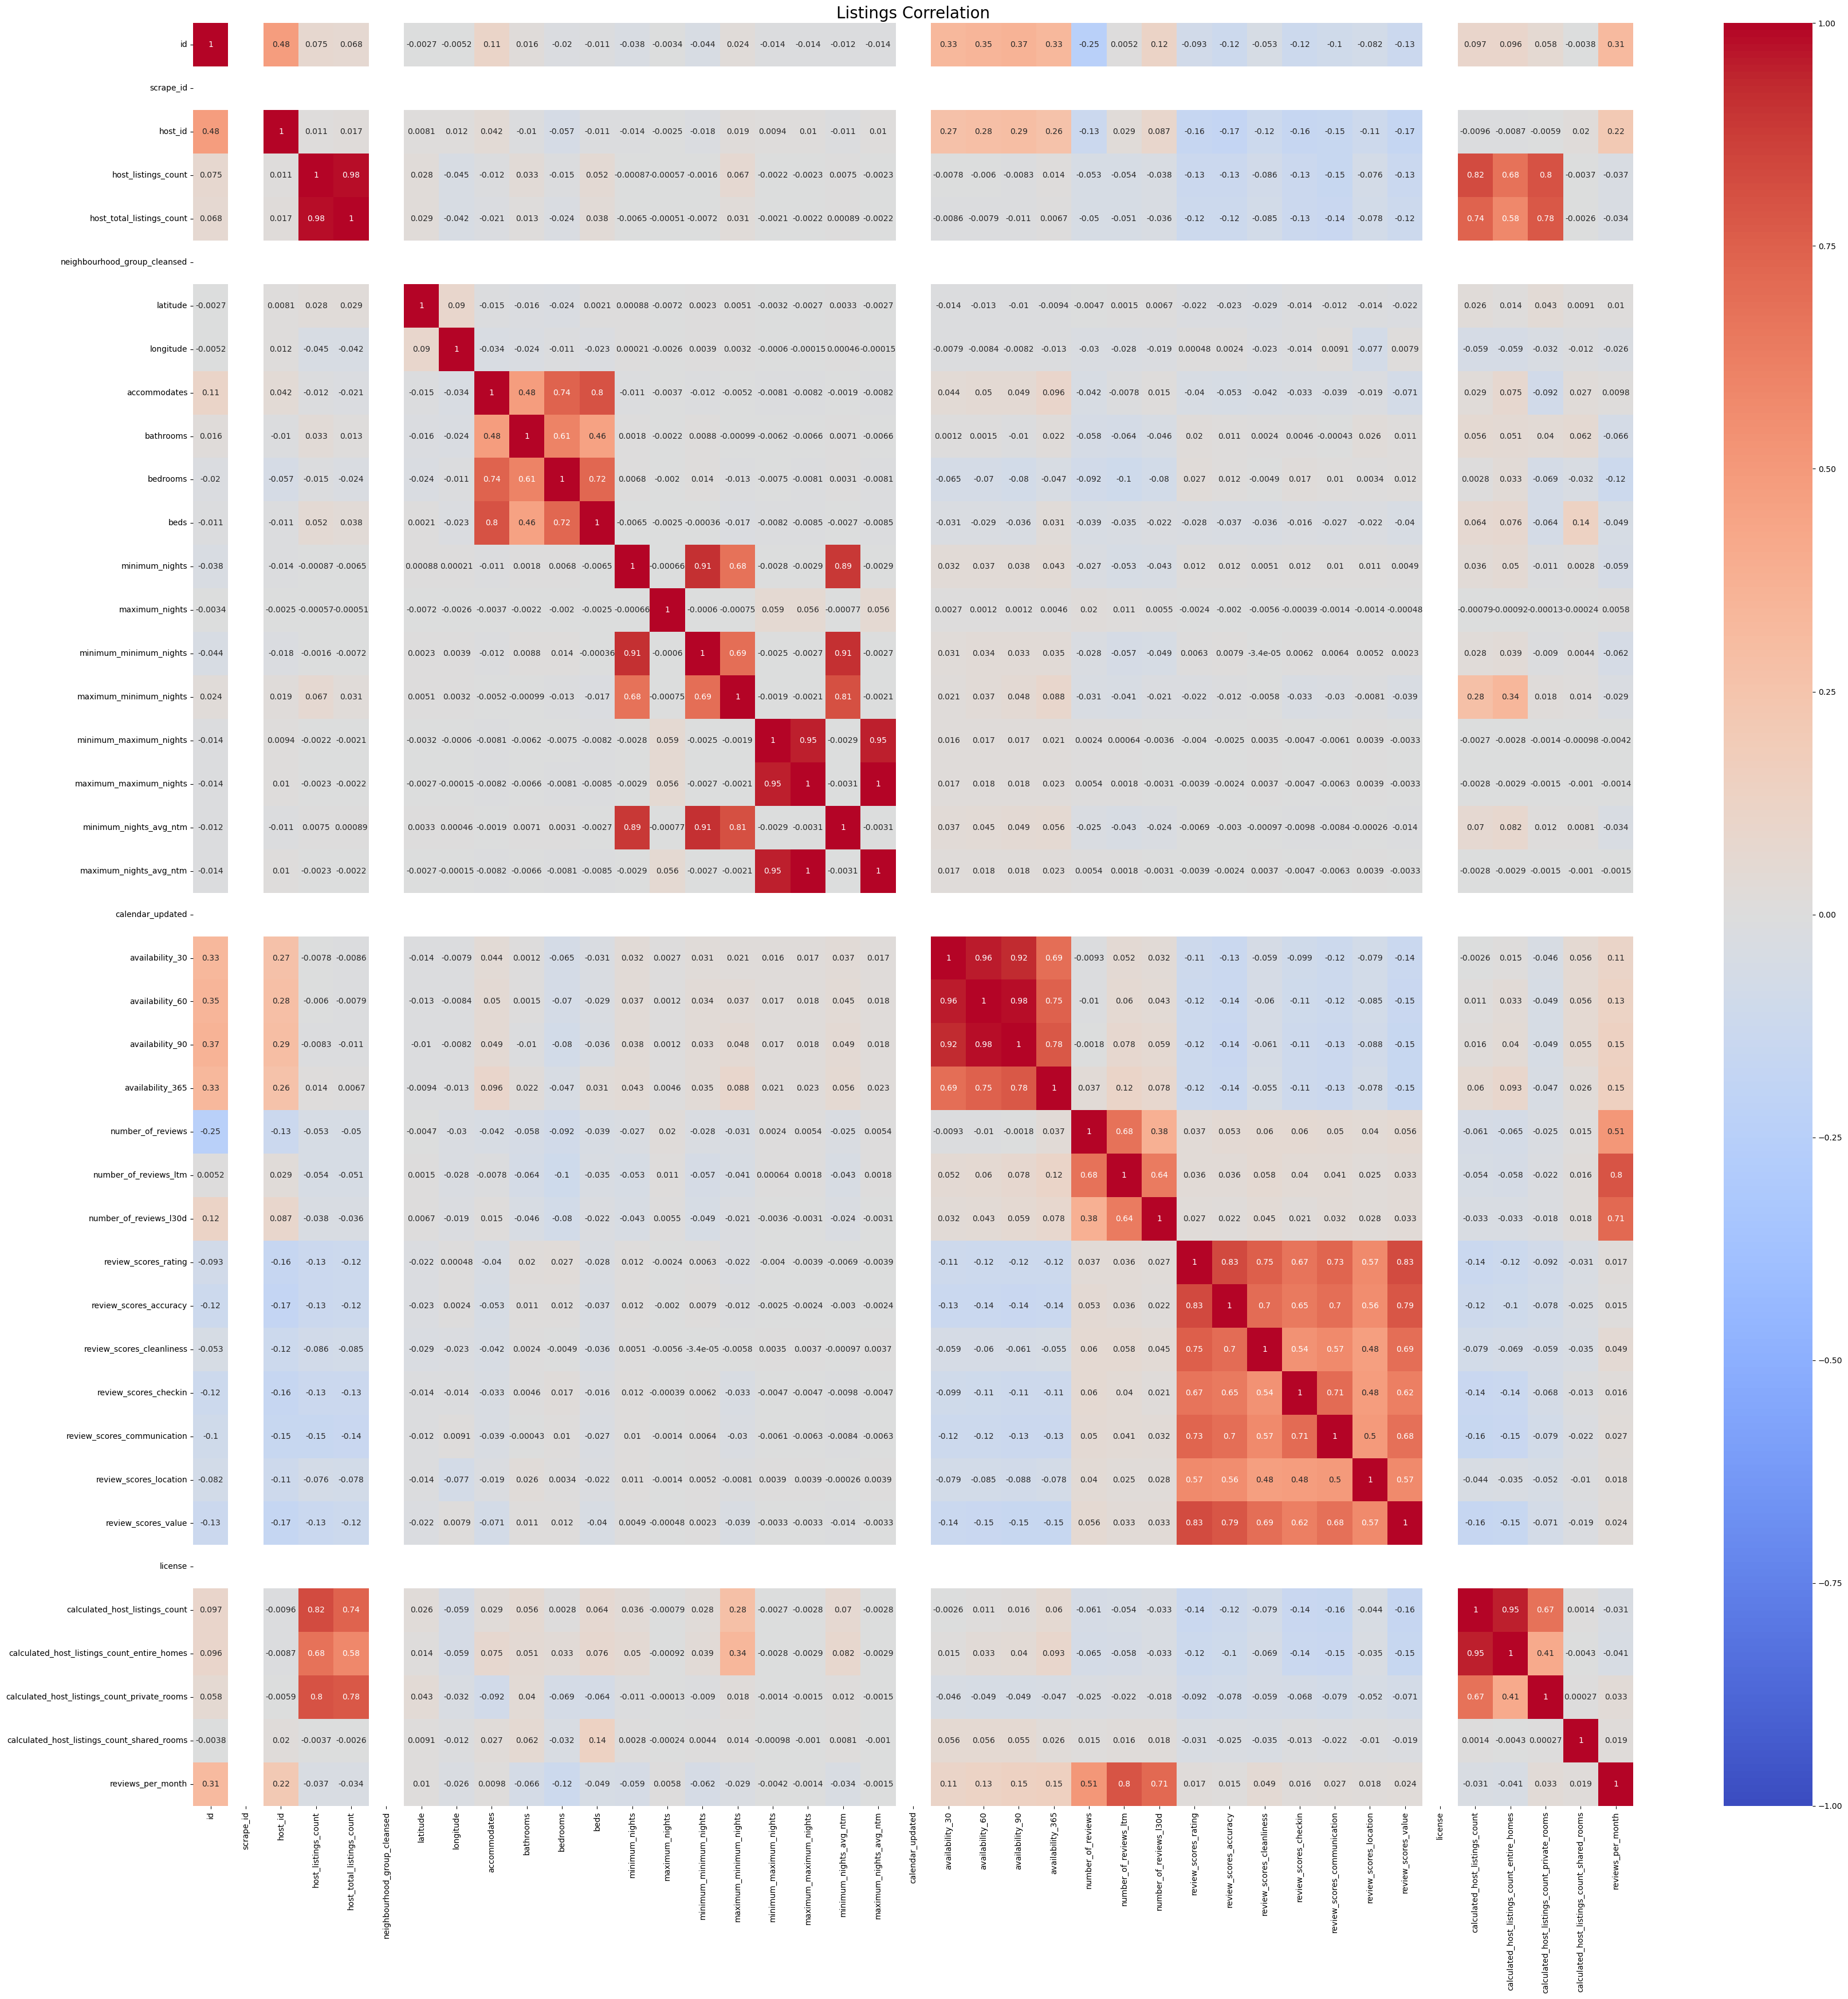

In [49]:
# Set up the matplotlib figure with larger size
plt.figure(figsize=(35, 35))

# Create the heatmap for listings
sns.heatmap(listings_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Listings Correlation', size=20)

# Show the plot
plt.tight_layout()
plt.show()

Notes:
- Nothing particularly stands out outside of the different aspects making up reviews. Any correlation noticed is because the attribute is very closely related e.g. beds with bedrooms
- Value (0.83) appears to hold greatest weight regarding overall rating, followed closely by accuracy of description (0.79) and then cleanliness (0.69) and communication (0.68). Checkin (0.62) and communication (0.57) are less influential but still of importance

- No price on heatmap - likely due to there being just under 40,000 null values

In [57]:
print(listings['review_scores_rating'][:20])

0     4.96
1     4.80
2     4.80
3     4.72
4     4.74
5     4.88
6     4.63
7     4.77
8     4.90
9      NaN
10    4.82
11    4.95
12    4.40
13    4.80
14    4.55
15    4.80
16    4.75
17    4.65
18    4.24
19    4.78
Name: review_scores_rating, dtype: float64


Cleaning of price column to get rid of dollar sign to see if that will cause it show on heatmap

#### Listings correation heat map with price

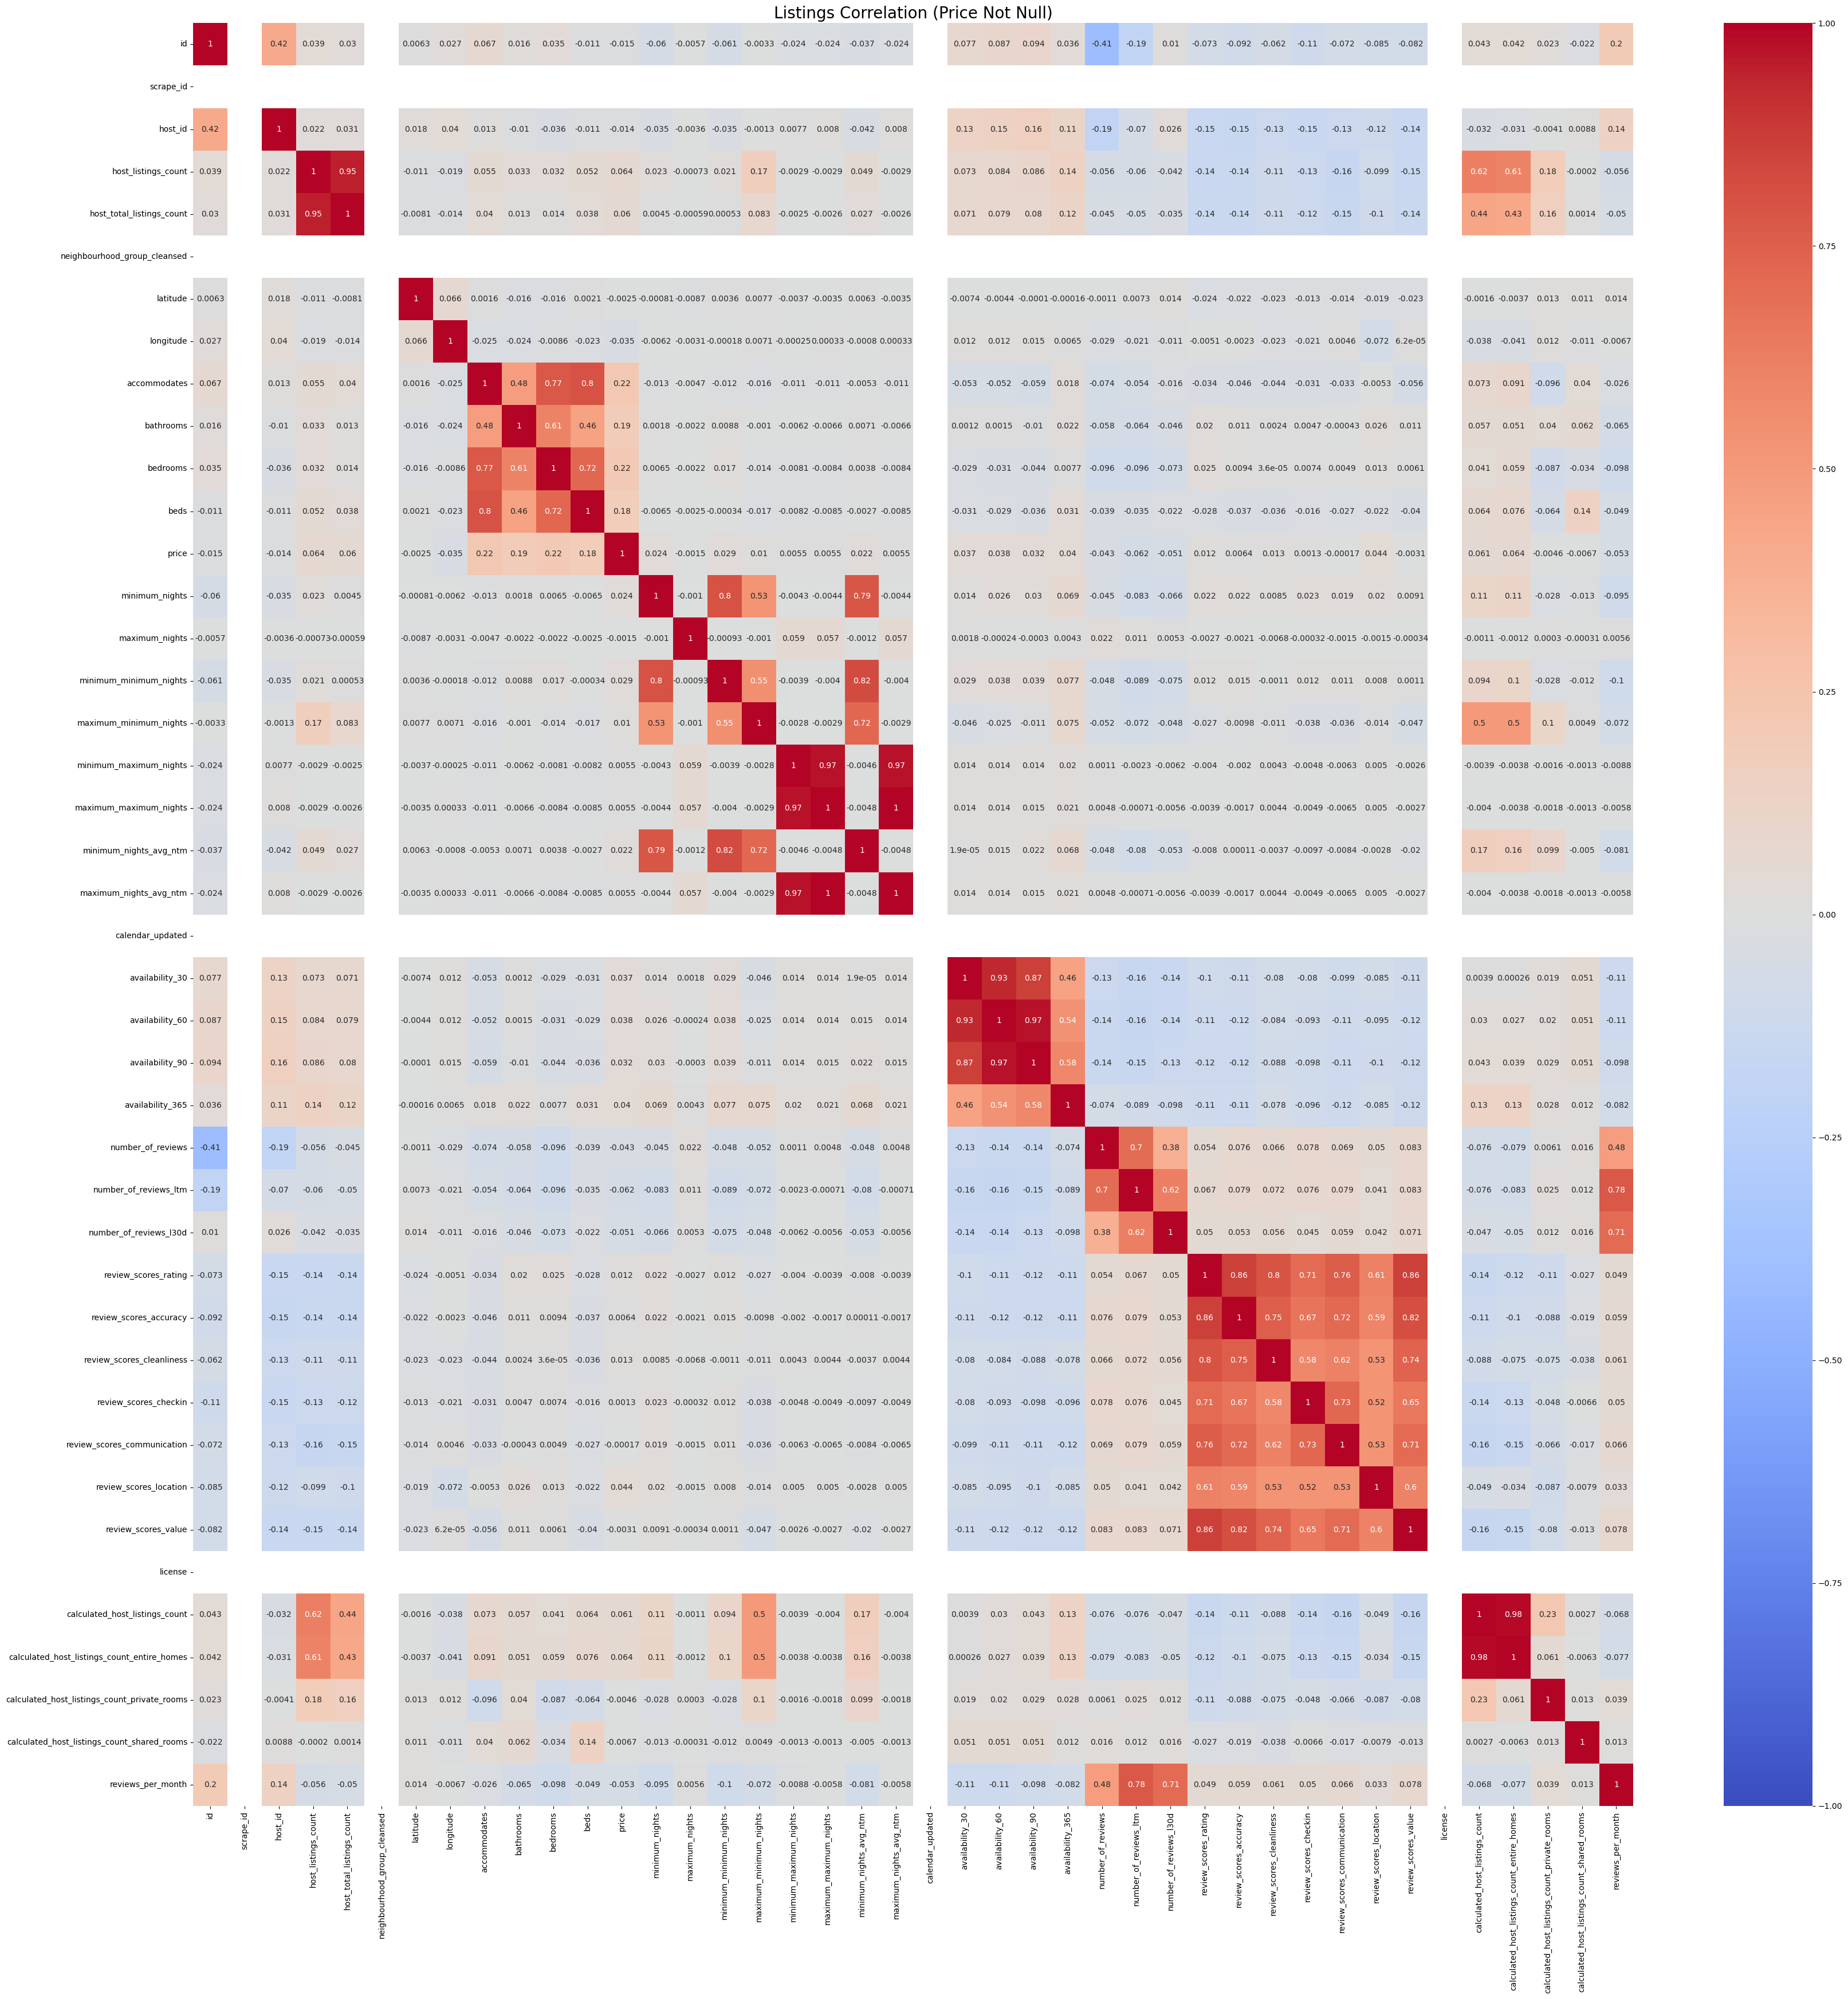

In [58]:
# convert price column, currently as an object, into string to be able to covert it to numeric without non numeric characters
listings['price'] = listings['price'].astype(str)

# Remove non-numeric characters from the price column and convert to numeric
listings['price'] = listings['price'].str.replace('[\$,]', '', regex=True).astype(float)

# Filter out rows where price is null
listings_non_null_price = listings[listings['price'].notnull()]

# Select only numeric columns for correlation
listings_numeric = listings_non_null_price.select_dtypes(include=[np.number])

# Set up the matplotlib figure with larger size
plt.figure(figsize=(35, 35))

# Create the heatmap for listings
sns.heatmap(listings_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Listings Correlation (Price Not Null)', size=20)

# Save the plot
plt.savefig('listings_heatmap.png')

# Show the plot
plt.tight_layout()
plt.show()

Notes:
- Some slight positive correlation regarding price with accomadates (0.22), beds(0.18), bedrooms(0.22) and bathrooms(0.19)
- Next to no correlation between price and review rating
- Some slight negative correlation between review rating and availability - makes sense as higher review likely to mean more demand
